In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

pd.options.display.max_rows = 100
plt.style.use('ggplot')

In [2]:
def getDataOld(filename):
    data = pd.read_csv(filename, names=['method', 'file', 'status', 'inf_input', 'quant_input', 'cuts_in', 'inf_output', 
                                        'quant_output', 'termset', 'mingrammar', 'num_mingrammars', 'can_sol', 'min_sol', 
                                        'time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_prcons', 
                                        'time_cleanproof'])
    data = data.replace(" ", -1)
    data = data.replace(-1, np.nan)
    data = data.replace('-1', np.nan)
    
    # Setting the correct datatypes
    columns = set(data.keys())
    integer_columns = [c for c in columns if c not in ['method', 'file', 'status']]
    for c in integer_columns:
        data[c] = data[c].astype(np.float)   
    data['method'] = data['method'].astype(str)
    data['file'] = data['file'].astype(str)
    data['status'] = data['status'].astype(str)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

def getData(filename):
    data = pd.read_json(filename)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP/prover9' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        elif 'testing/TSTP/leanCoP' in s:
            return 3
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

In [3]:
filename = "results.json"
data = getData(filename)

In [4]:
# Other exceptions (aka bugs to hunt)

data_other_exp = data[data.status == 'cutintro_other_exception']
print(data_other_exp.shape)
data_other_exp[['method', 'file', 'status']]

(4250, 28)


,method,file,status
1030,1_dtable,testing/TSTP/prover9/RNG/RNG001-1/Prover9---11...,cutintro_other_exception
2908,NaN,testing/TSTP/leanCoP/SCT/SCT165+1/leanCoP---2....,cutintro_other_exception
2912,NaN,testing/TSTP/leanCoP/SCT/SCT164+1/leanCoP---2....,cutintro_other_exception
2917,NaN,testing/TSTP/leanCoP/SCT/SCT131+1/leanCoP---2....,cutintro_other_exception
2934,NaN,testing/TSTP/leanCoP/RNG/RNG125+4/leanCoP---2....,cutintro_other_exception
2957,NaN,testing/TSTP/leanCoP/RNG/RNG121+4/leanCoP---2....,cutintro_other_exception
2982,NaN,testing/TSTP/leanCoP/RNG/RNG087+2/leanCoP---2....,cutintro_other_exception
2984,NaN,testing/TSTP/leanCoP/RNG/RNG086+2/leanCoP---2....,cutintro_other_exception
3017,NaN,testing/TSTP/leanCoP/KRS/KRS193+1/leanCoP---2....,cutintro_other_exception
3022,1_dtable,testing/TSTP/leanCoP/KRS/KRS065+1/leanCoP---2....,cutintro_other_exception


In [5]:
# Test that are ok in one_cut_one_quantifier and fail for many_cuts_one_quantifier_1

data_ocoq = data[data.method == 'one_cut_one_quant']
data_mcoq1 = data[data.method == 'many_cuts_one_quant_1']

merged = pd.merge(data_ocoq, data_mcoq1, on=['file'], suffixes=('_ocoq', '_mcoq1'))

diff = merged[(merged.status_ocoq == 'ok') & (merged.status_mcoq1 != 'ok')]
print(diff.shape)
diff[['file','status_ocoq', 'status_mcoq1']]

(0, 55)


,file,status_ocoq,status_mcoq1


In [6]:
# Test that are ok in many_cuts_one_quantifier_1 and fail for one_cut_one_quantifier

data_ocoq = data[data.method == 'one_cut_one_quant']
data_mcoq1 = data[data.method == 'many_cuts_one_quant_1']

merged = pd.merge(data_ocoq, data_mcoq1, on=['file'], suffixes=('_ocoq', '_mcmq1'))

diff = merged[(merged.status_ocoq != 'ok') & (merged.status_mcmq1 == 'ok')]
print(diff.shape)
diff[['file','status_ocoq', 'status_mcmq1']]

(0, 55)


,file,status_ocoq,status_mcmq1


In [7]:
# Regressions compared to previous test

previous_filename = "../2015-03-15/CutIntroDataLog.txt"
previous_data = getDataOld(previous_filename)

merged = pd.merge(data, previous_data, on=['method', 'file'])
#merged.head(0)

regression = merged[(merged.status_y == 'ok') & (merged.status_x != 'ok')]
#regression.head(0)
print(regression.shape)

regression_delta = regression[(regression.method == 'one_cut_one_quant') | (regression.method == 'one_cut_many_quant')]
print(regression_delta.shape)
#regression_delta.head(0)

regression_maxsat = regression[((regression.method == 'many_cuts_one_quant_1') | (regression.method == 'many_cuts_one_quant_2')) ]
print(regression_maxsat.shape)
#regression_maxsat.head(0)

regression[['method', 'file', 'status_x', 'status_y']]

(0, 46)
(0, 46)
(0, 46)


,method,file,status_x,status_y


In [8]:
methods = sorted(set(data.method.dropna()))

dbs = {
    0: 'Proof examples',
    1: 'Prover9',
    2: 'VeriT',
    3: 'LeanCoP',
}

In [9]:
print("=== Number of tests per database and method:\n")

for dbi, dbname in dbs.items():
    for method in methods:
        print("{0} - {1}: {2}".format(dbname, method,
                                     data[(data.method==method) & (data.db==dbi)].shape[0]))
    print()

=== Number of tests per database and method:

Proof examples - 1_1_maxsat: 117
Proof examples - 1_dtable: 104
Proof examples - 1_maxsat: 200
Proof examples - 2_2_maxsat: 45
Proof examples - 2_maxsat: 87
Proof examples - many_dtable: 99

Prover9 - 1_1_maxsat: 2779
Prover9 - 1_dtable: 2778
Prover9 - 1_maxsat: 2778
Prover9 - 2_2_maxsat: 2779
Prover9 - 2_maxsat: 2779
Prover9 - many_dtable: 2778

VeriT - 1_1_maxsat: 142
VeriT - 1_dtable: 142
VeriT - 1_maxsat: 142
VeriT - 2_2_maxsat: 142
VeriT - 2_maxsat: 142
VeriT - many_dtable: 142

LeanCoP - 1_1_maxsat: 555
LeanCoP - 1_dtable: 555
LeanCoP - 1_maxsat: 555
LeanCoP - 2_2_maxsat: 555
LeanCoP - 2_maxsat: 555
LeanCoP - many_dtable: 555



In [10]:
states = set(data.status.values)
status_colors = {}
for s in data.status.values:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s.endswith('timeout'):
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

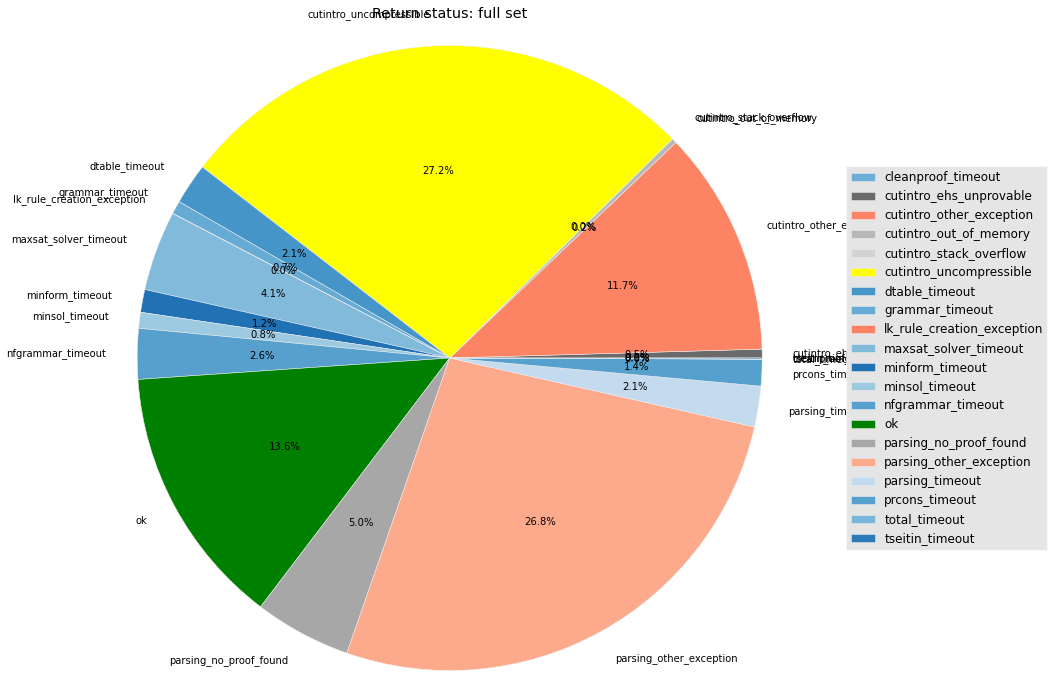

In [11]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

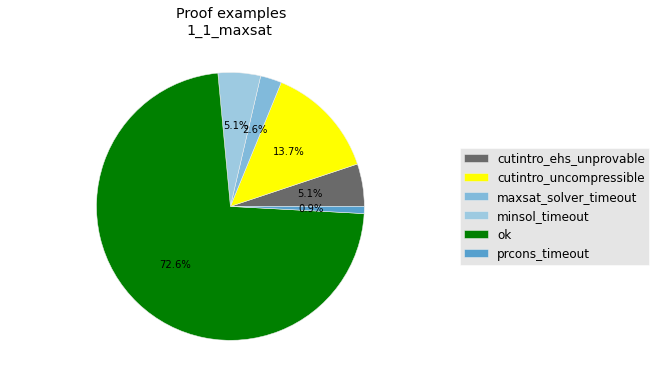

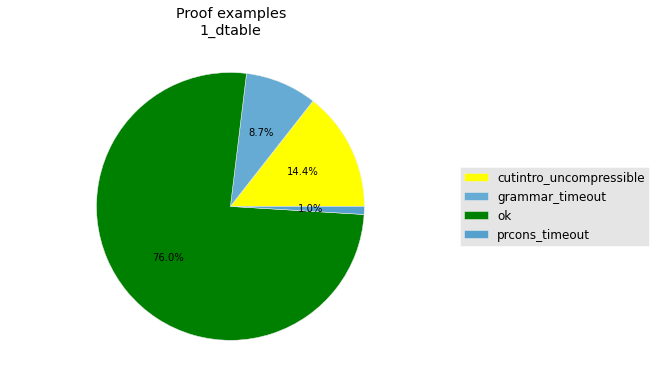

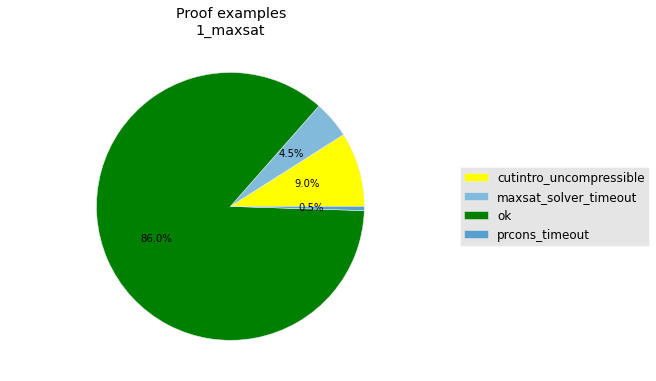

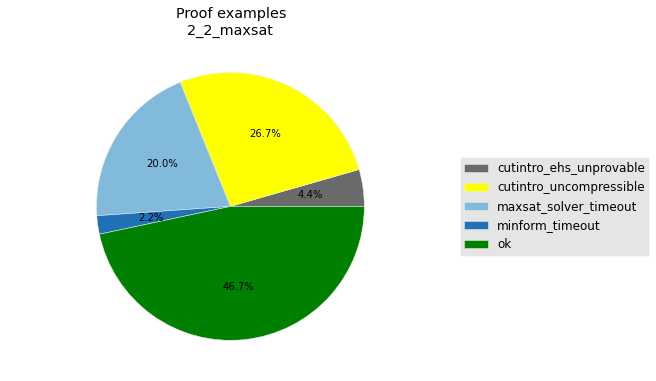

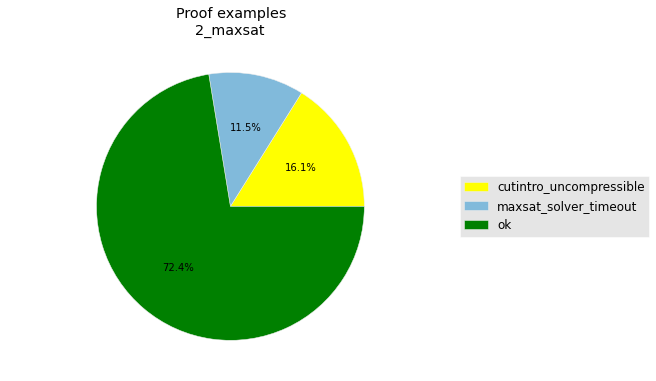

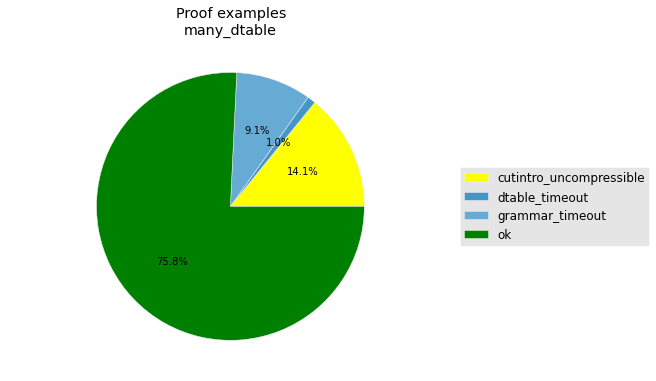

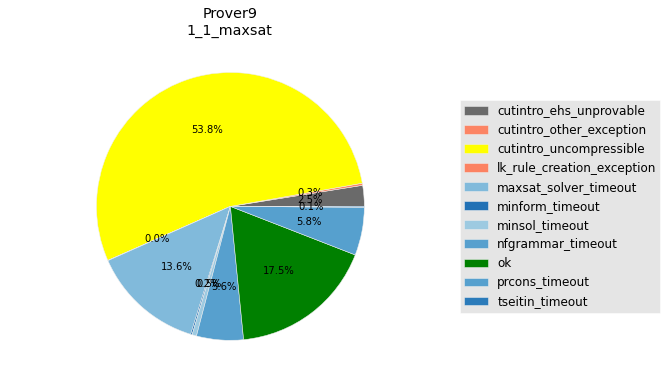

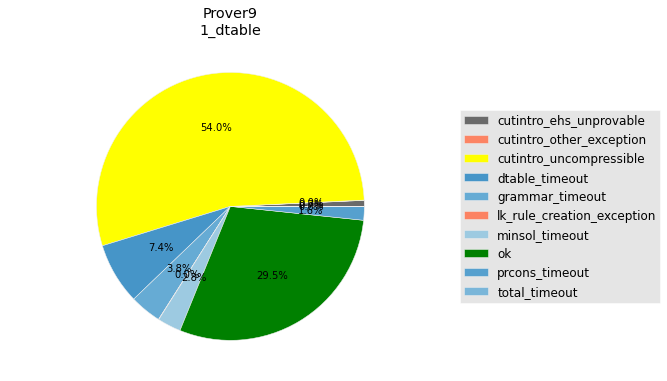

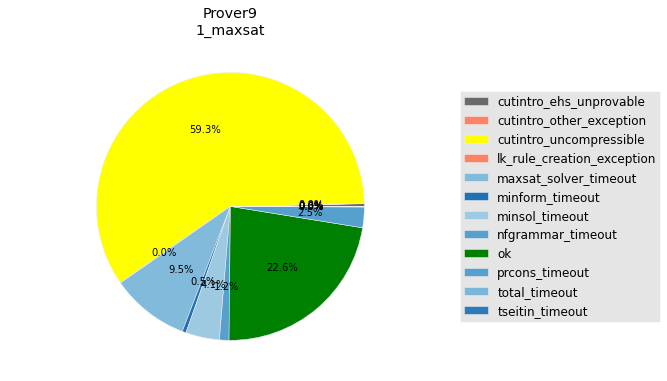

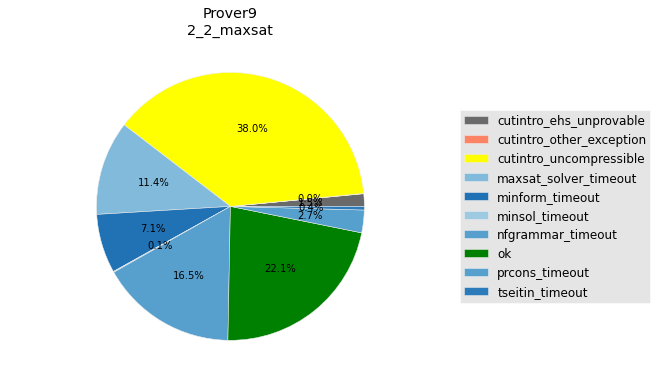

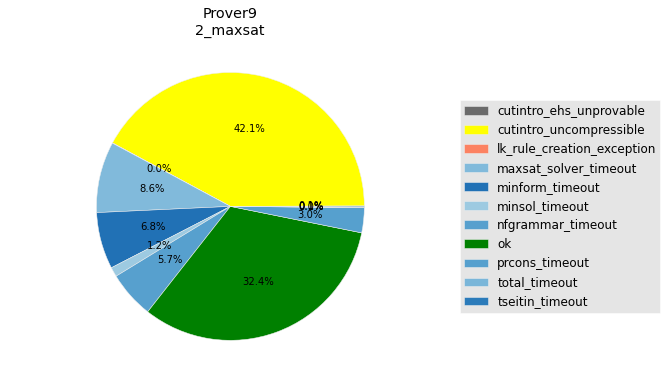

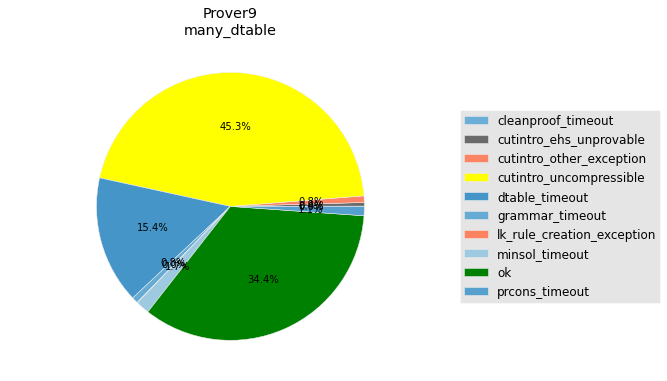

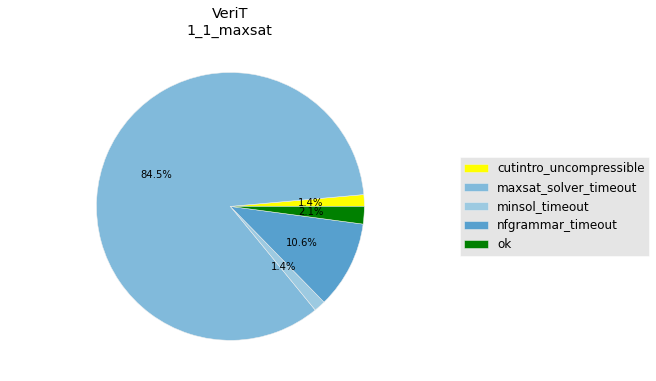

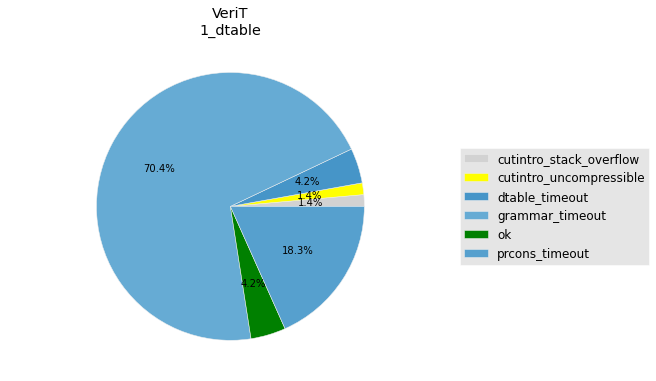

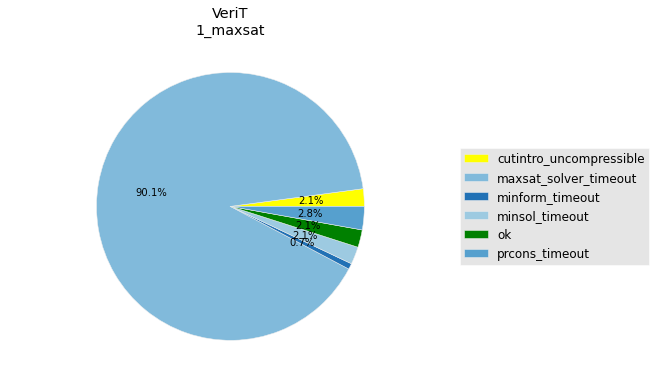

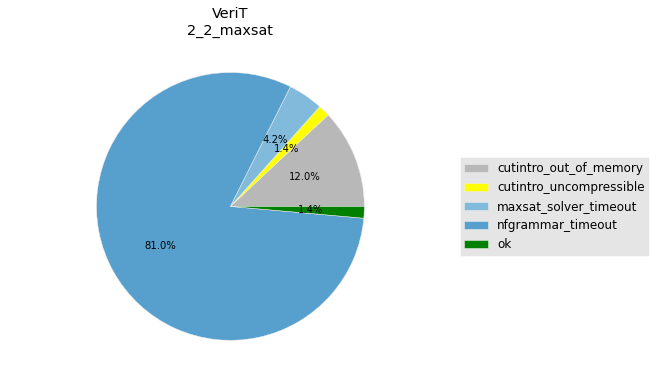

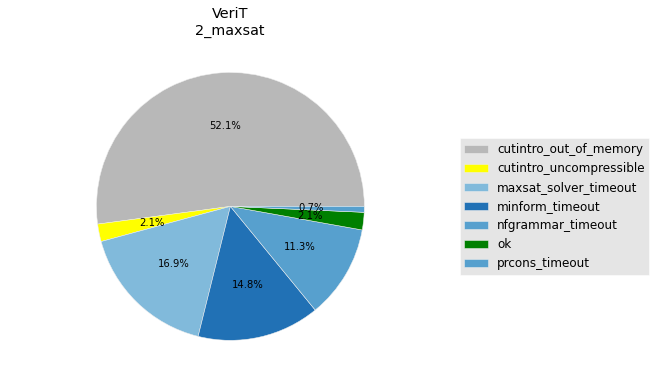

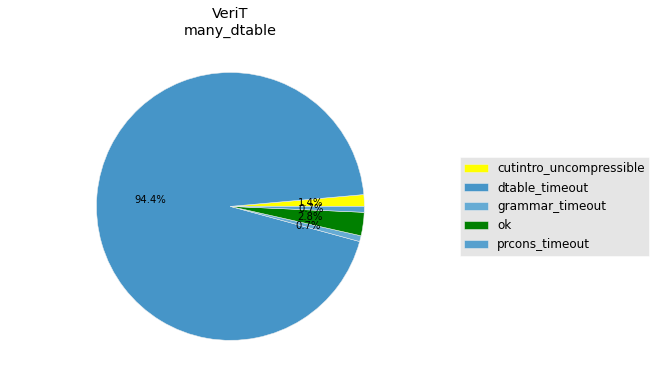

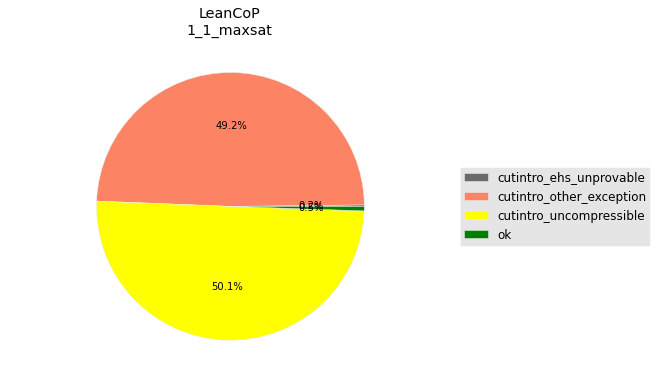

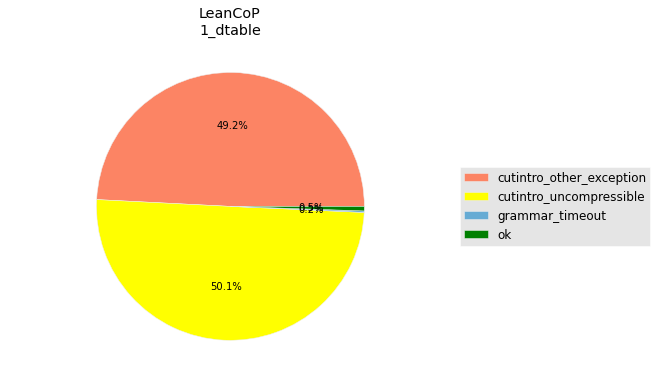

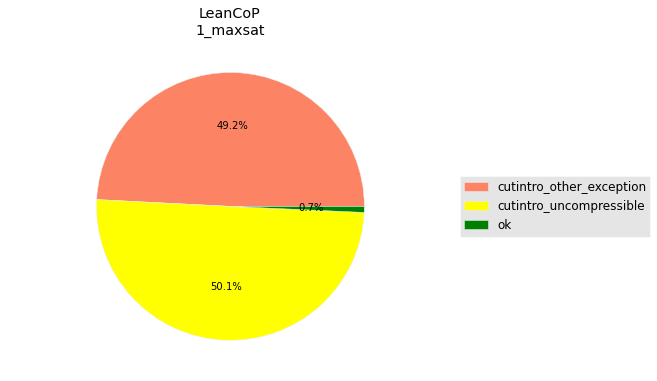

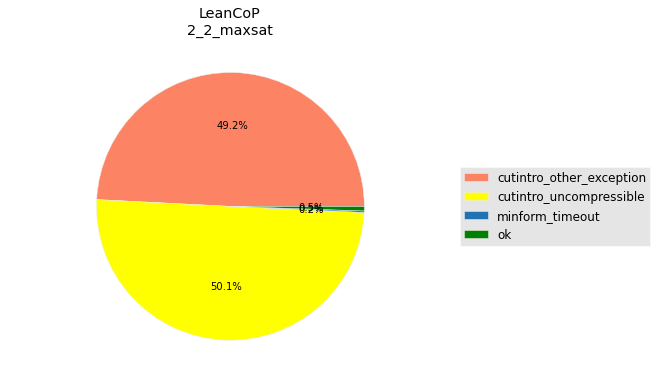

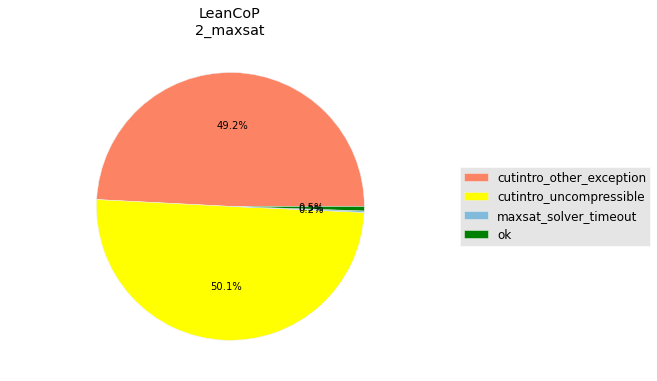

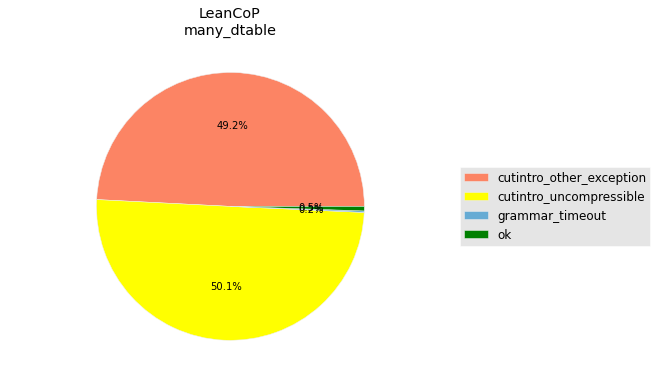

In [12]:
for dbi, db in dbs.items():
    for method in methods:
        subdata = data[(data.db==dbi) & (data.method==method)].groupby('status').size()
        plot_status(subdata, title='{0}\n{1}'.format(db,method), labels=None, figsize=(8,6))
        plt.show()

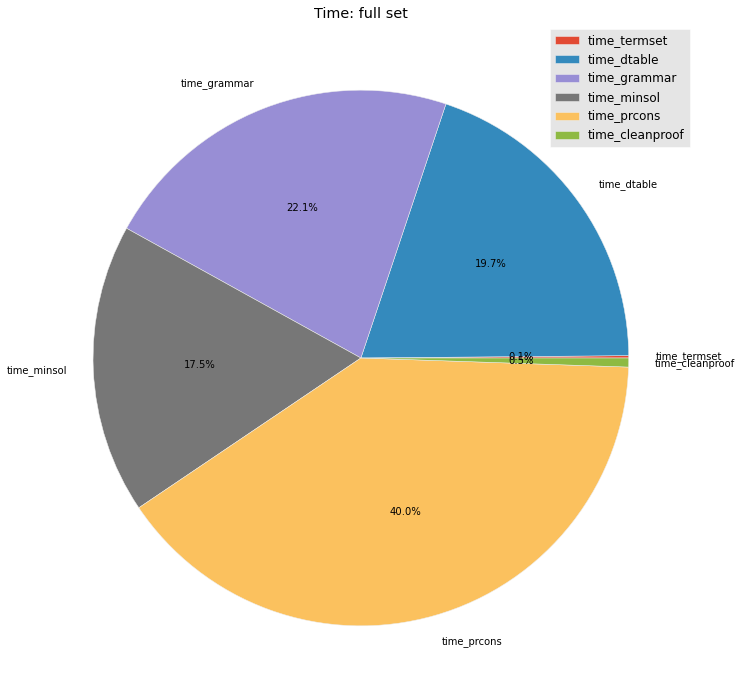

In [13]:
timecols = ['time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_prcons', 'time_cleanproof']
plt.axis('equal')
data[timecols].mean().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%',
                           title='Time: full set', legend=True).set_ylabel('')

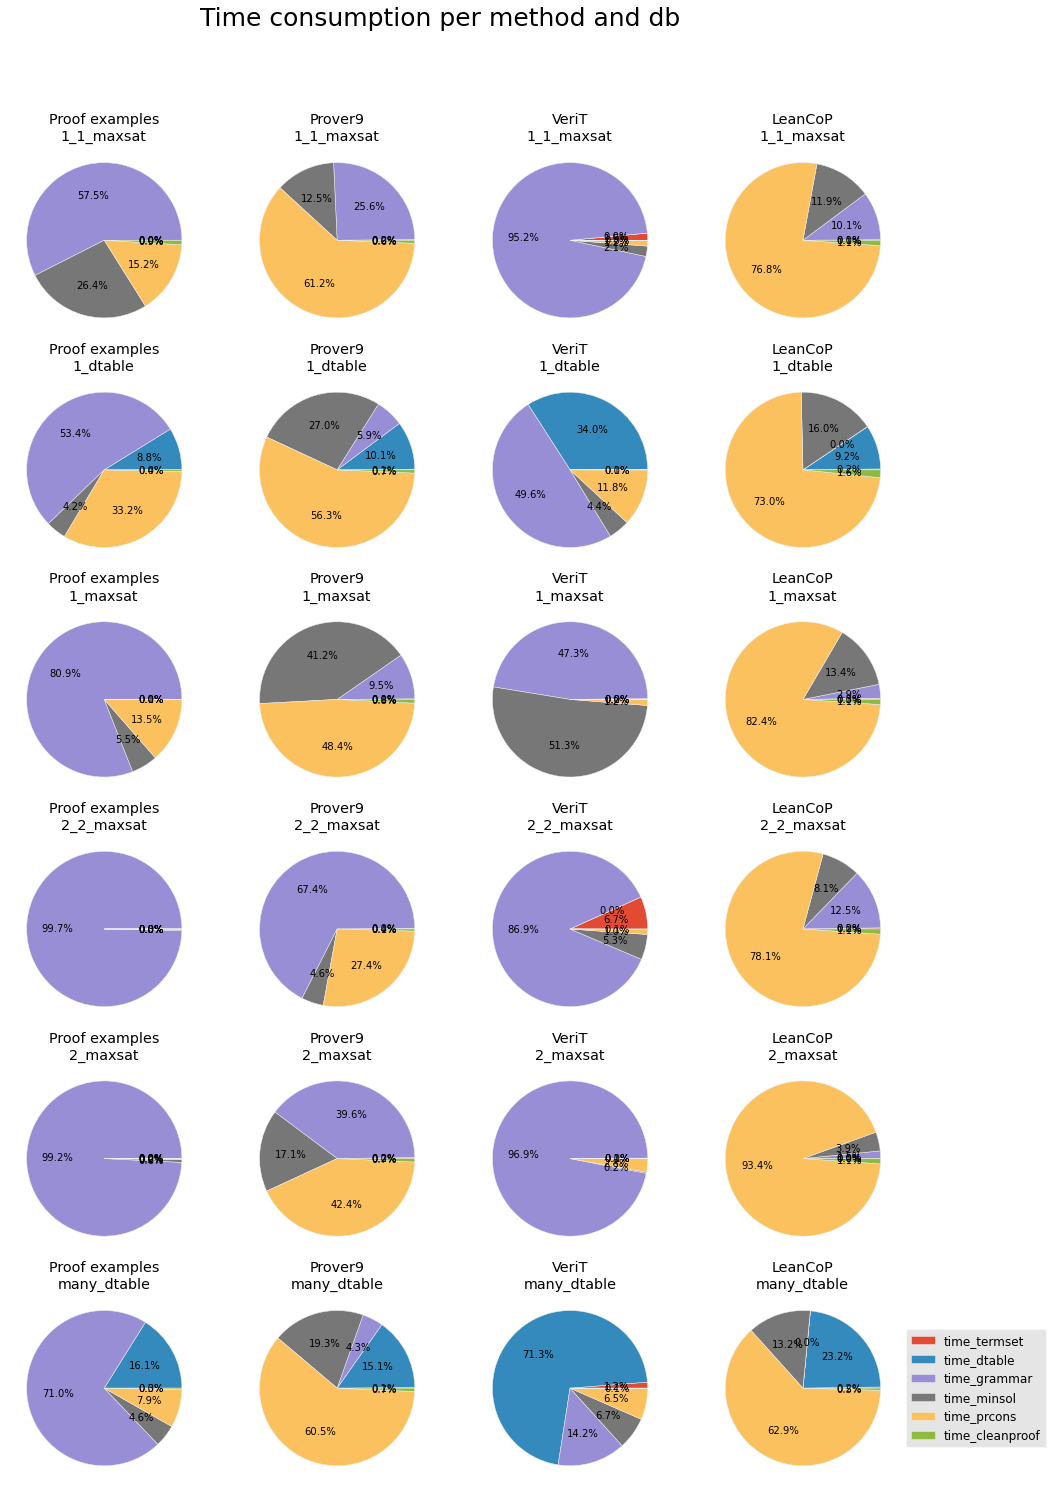

In [14]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        data[(data.db==dbi) & (data.method==method)][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method)).set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

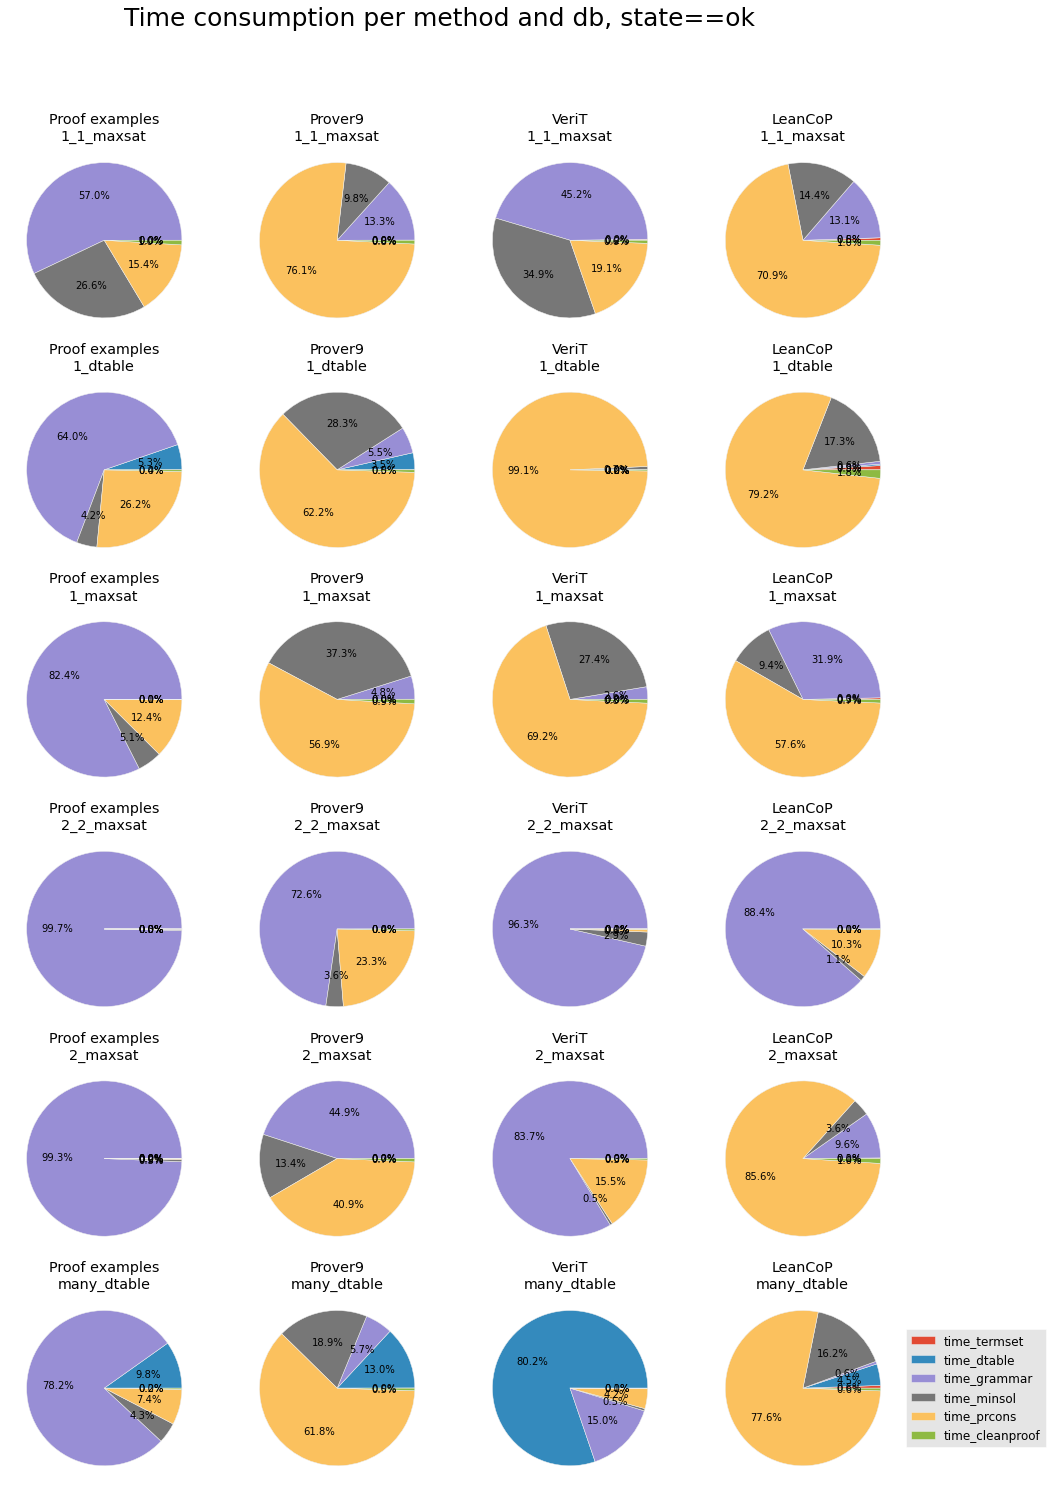

In [15]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db, state==ok', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        ax = data[(data.db==dbi) & (data.method==method) & (data.status=='ok')][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method))
        ax.set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
# For Daniel
more_than_one_cut = data[(data.cuts_in > 1)]
print(more_than_one_cut.shape)
more_than_one_cut

(2906, 28)


,can_sol,cuts_in,file,inf_input,inf_output,method,min_sol,minform_lcomp,mingrammar,nfgrammar,...,time_maxsat,time_maxsat_solver,time_minform,time_minsol,time_nfgrammar,time_prcons,time_termset,time_total,time_tseitin,db
115,28,424,testing/TSTP/prover9/SET/SET287-6/Prover9---11...,161,2390,1_dtable,28,NaN,20,NaN,...,NaN,NaN,NaN,187,NaN,1492,1,1910,NaN,1
116,9,22,testing/TSTP/prover9/SET/SET994+1/Prover9---11...,156,112,1_dtable,4,NaN,28,NaN,...,NaN,NaN,NaN,40,NaN,237,1,465,NaN,1
121,13,296,testing/TSTP/prover9/SWW/SWW101+1/Prover9---11...,1030,2925,1_dtable,9,NaN,27,NaN,...,NaN,NaN,NaN,558,NaN,12993,1,15439,NaN,1
125,4,3,testing/TSTP/prover9/GRP/GRP189-2/Prover9---11...,254,1029,1_dtable,2,NaN,35,NaN,...,NaN,NaN,NaN,144,NaN,6990,3,7637,NaN,1
131,4,6,testing/TSTP/prover9/HEN/HEN008-5/Prover9---11...,237,104,1_dtable,4,NaN,11,NaN,...,NaN,NaN,NaN,61,NaN,77,1,291,NaN,1
132,10,31,testing/TSTP/prover9/ALG/ALG178+1/Prover9---11...,144,168,1_dtable,10,NaN,12,NaN,...,NaN,NaN,NaN,12,NaN,98,0,197,NaN,1
135,4,5,testing/TSTP/prover9/COL/COL009-1/Prover9---11...,69,94,1_dtable,4,NaN,10,NaN,...,NaN,NaN,NaN,8,NaN,127,0,202,NaN,1
138,10,15,testing/TSTP/prover9/RNG/RNG108+4/Prover9---11...,80,113,1_dtable,10,NaN,11,NaN,...,NaN,NaN,NaN,24,NaN,112,0,355,NaN,1
156,29,121,testing/TSTP/prover9/HEN/HEN004-1/Prover9---11...,206,655,1_dtable,27,NaN,24,NaN,...,NaN,NaN,NaN,979,NaN,353,1,1692,NaN,1
158,10,70,testing/TSTP/prover9/SWV/SWV477+1/Prover9---11...,1608,578,1_dtable,5,NaN,28,NaN,...,NaN,NaN,NaN,18,NaN,407,1,6692,NaN,1


In [17]:
data['status'].value_counts()

cutintro_uncompressible       9899
parsing_other_exception       9765
ok                            4942
cutintro_other_exception      4250
parsing_no_proof_found        1824
maxsat_solver_timeout         1504
nfgrammar_timeout              952
dtable_timeout                 775
parsing_timeout                768
prcons_timeout                 501
minform_timeout                430
minsol_timeout                 299
grammar_timeout                248
cutintro_ehs_unprovable        164
cutintro_out_of_memory          91
tseitin_timeout                 19
lk_rule_creation_exception       5
total_timeout                    3
cutintro_stack_overflow          2
cleanproof_timeout               1
dtype: int64

In [18]:
# Different grammar sizes between different methods: one cut with one quantifier
data[(data.mingrammar >= 0) & ((data.method == 'one_cut_one_quant') | (data.method == 'many_cuts_one_quant_1'))] \
    .groupby('file') \
    .filter(lambda x: len(set(x.mingrammar)) > 1) \
    .sort('file')[['file', 'method', 'mingrammar']]

,file,method,mingrammar


In [19]:
# Different grammar sizes between different methods: one cut with 2/many quantifiers
data[(data.mingrammar >= 0) & ((data.method == 'one_cut_many_quant') | (data.method == 'many_cuts_many_quant_2'))] \
    .groupby('file') \
    .filter(lambda x: len(set(x.mingrammar)) > 1) \
    .sort('file')[['file', 'method', 'mingrammar']]

,file,method,mingrammar


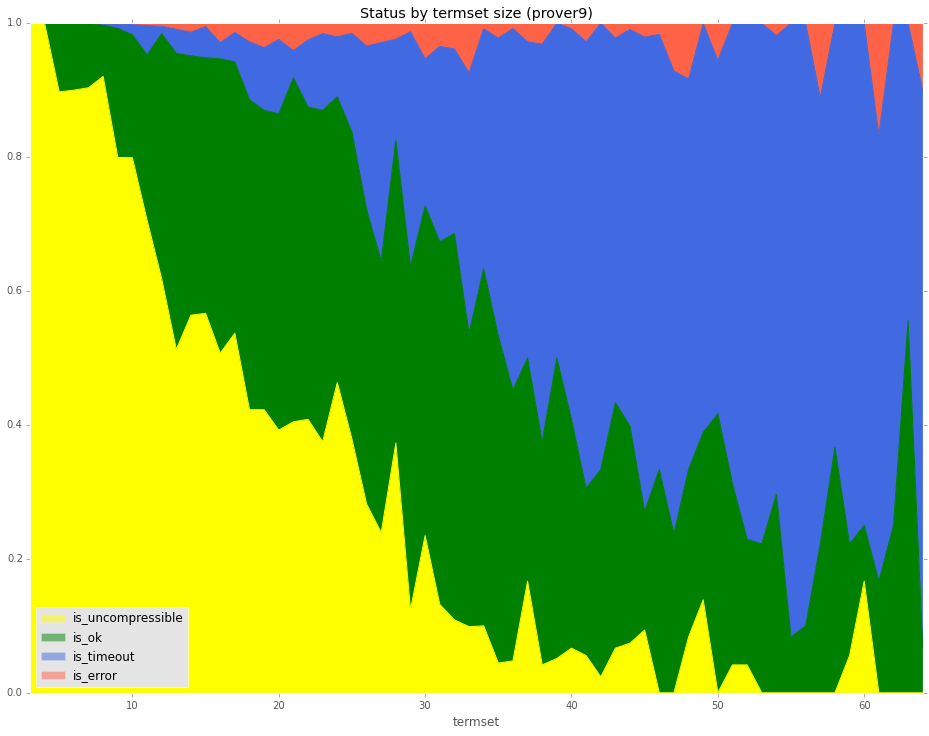

In [20]:
data['is_ok'] = data.status=='ok'
data['is_uncompressible'] = data.status.str.endswith('uncompressible')
data['is_timeout'] = data.status.str.endswith('timeout')
data['is_error'] = ~data.is_ok & ~data.is_uncompressible & ~data.is_timeout

data[(data.termset<65)&(data.db==1)].groupby('termset').mean() \
    [['is_uncompressible', 'is_ok', 'is_timeout', 'is_error']] \
    .plot(kind='area', figsize=(16,12), ylim=(0,1), title='Status by termset size (prover9)',
          color=['yellow', 'green', 'royalblue', 'tomato'])

In [21]:
# Proofs with good compression
data[data.inf_output < 0.1*data.inf_input]

,can_sol,cuts_in,file,inf_input,inf_output,method,min_sol,minform_lcomp,mingrammar,nfgrammar,...,time_nfgrammar,time_prcons,time_termset,time_total,time_tseitin,db,is_ok,is_uncompressible,is_timeout,is_error
309,4,8,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,845,56,1_dtable,2,NaN,34,NaN,...,NaN,136,2,2125,NaN,1,True,False,False,False
514,16,1,testing/TSTP/prover9/SET/SET047-5/Prover9---11...,4629,428,1_dtable,16,NaN,12,NaN,...,NaN,33,0,1691,NaN,1,True,False,False,False
1265,28,39,testing/TSTP/prover9/SET/SET887+1/Prover9---11...,2671,202,1_dtable,26,NaN,31,NaN,...,NaN,97,2,2852,NaN,1,True,False,False,False
2118,16,1,testing/TSTP/prover9/SET/SET788+1/Prover9---11...,4629,360,1_dtable,16,NaN,12,NaN,...,NaN,24,0,1633,NaN,1,True,False,False,False
2251,16,1,testing/TSTP/prover9/SET/SET047+1/Prover9---11...,4629,360,1_dtable,16,NaN,12,NaN,...,NaN,35,1,1581,NaN,1,True,False,False,False
6373,4,8,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,845,56,many_dtable,2,NaN,34,NaN,...,NaN,137,2,2131,NaN,1,True,False,False,False
7199,9,1,testing/TSTP/prover9/BOO/BOO011-4/Prover9---11...,271,14,many_dtable,5,NaN,26,NaN,...,NaN,33,1,265,NaN,1,True,False,False,False
7329,28,39,testing/TSTP/prover9/SET/SET887+1/Prover9---11...,2671,202,many_dtable,26,NaN,31,NaN,...,NaN,94,2,2893,NaN,1,True,False,False,False
7757,8,4,testing/TSTP/prover9/SCT/SCT080-1/Prover9---11...,292,24,many_dtable,4,NaN,23,NaN,...,NaN,152,2,1001,NaN,1,True,False,False,False
12538,8,12,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,845,78,1_maxsat,6,834,34,94,...,5,89,1,2192,3,1,True,False,False,False


In [22]:
# Proofs with blowup
data[data.inf_output > 1000*data.inf_input]

,can_sol,cuts_in,file,inf_input,inf_output,method,min_sol,minform_lcomp,mingrammar,nfgrammar,...,time_nfgrammar,time_prcons,time_termset,time_total,time_tseitin,db,is_ok,is_uncompressible,is_timeout,is_error
18350,16,2,SquareEdgesExampleProof(12),83,176496,1_1_maxsat,20,19331,11,108,...,27,26435,1,29098,48,0,True,False,False,False
18355,16,2,SquareEdgesExampleProof(17),118,176547,1_1_maxsat,20,52261,12,153,...,94,33261,1,42240,142,0,True,False,False,False


In [23]:
# Proofs with an interesting number of cuts
data[data.cuts_in > 5000]

,can_sol,cuts_in,file,inf_input,inf_output,method,min_sol,minform_lcomp,mingrammar,nfgrammar,...,time_nfgrammar,time_prcons,time_termset,time_total,time_tseitin,db,is_ok,is_uncompressible,is_timeout,is_error
13989,41,5681,testing/TSTP/prover9/CAT/CAT009-1/Prover9---11...,318,33906,1_maxsat,41,715,22,52,...,3,36116,2,36710,2,1,True,False,False,False
24519,45,7345,testing/TSTP/prover9/HEN/HEN004-1/Prover9---11...,206,41439,2_maxsat,43,11914,17,191,...,16,48746,1,59894,84,1,True,False,False,False
25315,32,5204,testing/TSTP/prover9/GEO/GEO009-3/Prover9---11...,119,45568,2_maxsat,32,3074,14,88,...,3,28242,0,28994,14,1,True,False,False,False
25945,26,7109,testing/TSTP/prover9/LAT/LAT302+1/Prover9---11...,235,72794,2_maxsat,26,1223,22,98,...,4,52201,2,53543,5,1,True,False,False,False
31028,13,9592,testing/TSTP/prover9/CAT/CAT014-3/Prover9---11...,181,86033,2_2_maxsat,13,22946,11,277,...,8,44359,1,47305,164,1,True,False,False,False
31955,26,7109,testing/TSTP/prover9/LAT/LAT302+1/Prover9---11...,235,72794,2_2_maxsat,26,6279,22,304,...,149,53181,1,54807,35,1,True,False,False,False
33164,26,7101,testing/TSTP/prover9/LAT/LAT303+1/Prover9---11...,268,72758,2_2_maxsat,26,5256,21,179,...,113,53827,1,55470,24,1,True,False,False,False


In [24]:
ax = (data.time_maxsat/data.time_grammar).dropna().plot(kind='hist', figsize=(14,8),
    title='Percentage of grammar finding time spent in MaxSAT solver', bins=20)
ax.set_xlabel('percentage')
ax.set_ylabel('number of testcases')

ValueError: Invalid chart type given hist